CNN MODEL FOR CLASSIFICATION OF FLOWERS

1. DOWNLOAD THE DATA SET

In [1]:
cd/content/drive/MyDrive

/content/drive/MyDrive


In [3]:
!unzip '/content/drive/MyDrive/sss/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/sss/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524

2. IMAGE AUGMENTATION

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [6]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import splitfolders

In [9]:
input_folder='/content/drive/MyDrive/flowers'

In [10]:
splitfolders.ratio(input_folder,output='/content/drive/MyDrive/flowersdataset',ratio=(.8,0,.2),group_prefix=None)

Copying files: 4317 files [01:01, 70.57 files/s]


In [11]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowersdataset/train",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 3452 images belonging to 5 classes.


In [12]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowersdataset/test",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 865 images belonging to 5 classes.


In [13]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

3. CREATE MODEL

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [15]:
model=Sequential()

4. ADD LAYERS(CONVOLUTION, MAX POOLING, FLATTEN, DENSE, HIDDEN, OUTPUT LAYERS)

In [16]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Flatten())

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [21]:
model.add(Dense(5,activation='softmax'))

5. COMPILE THE MODEL

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
len(x_train)

144

6. FIT THE MODEl

In [24]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
144/144 [==============================] - 46s 317ms/step - loss: 1.5580 - accuracy: 0.4059 - val_loss: 1.2358 - val_accuracy: 0.4890
Epoch 2/10
144/144 [==============================] - 43s 296ms/step - loss: 1.0858 - accuracy: 0.5698 - val_loss: 1.0429 - val_accuracy: 0.6046
Epoch 3/10
144/144 [==============================] - 50s 344ms/step - loss: 0.9842 - accuracy: 0.6179 - val_loss: 0.9883 - val_accuracy: 0.6254
Epoch 4/10
144/144 [==============================] - 43s 301ms/step - loss: 0.9003 - accuracy: 0.6512 - val_loss: 1.0834 - val_accuracy: 0.6116
Epoch 5/10
144/144 [==============================] - 42s 293ms/step - loss: 0.8431 - accuracy: 0.6808 - val_loss: 1.2665 - val_accuracy: 0.5445
Epoch 6/10
144/144 [==============================] - 47s 329ms/step - loss: 0.8054 - accuracy: 0.6895 - val_loss: 0.9384 - val_accuracy: 0.6555
Epoch 7/10
144/144 [==============================] - 44s 302ms/step - loss: 0.7545 - accuracy: 0.7132 - val_loss: 1.0116 - val_ac

7. SAVE THE MODEL

In [25]:
model.save('flowers.h5')

8. TEST THE MODEL

In [26]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

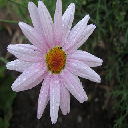

In [27]:
img=image.load_img(r"/content/drive/MyDrive/flowersdataset/test/daisy/3706420943_66f3214862_n.jpg",target_size=(128,128))
img

In [28]:
img=image.load_img(r"/content/drive/MyDrive/flowersdataset/test/daisy/3706420943_66f3214862_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'daisy'

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

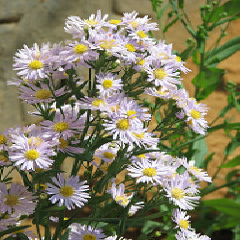

In [30]:
img=image.load_img(r"/content/drive/MyDrive/flowersdataset/test/daisy/99306615_739eb94b9e_m.jpg",target_size=(240,240))
img

Array Conversion

In [31]:
x = image.img_to_array(img)
x

array([[[128., 123.,  94.],
        [131., 126.,  97.],
        [131., 126.,  97.],
        ...,
        [ 46.,  77.,  17.],
        [ 46.,  77.,  17.],
        [ 46.,  75.,  17.]],

       [[124., 119.,  89.],
        [128., 123.,  94.],
        [128., 123.,  94.],
        ...,
        [ 44.,  73.,  15.],
        [ 44.,  73.,  15.],
        [ 43.,  70.,  17.]],

       [[119., 116.,  85.],
        [125., 121.,  92.],
        [125., 121.,  92.],
        ...,
        [ 43.,  70.,  17.],
        [ 43.,  70.,  17.],
        [ 43.,  67.,  19.]],

       ...,

       [[ 49.,  56.,  14.],
        [119., 112.,  58.],
        [119., 112.,  58.],
        ...,
        [ 94., 131.,  62.],
        [ 94., 131.,  62.],
        [ 79., 121.,  37.]],

       [[ 88.,  86.,  38.],
        [126., 114.,  66.],
        [126., 114.,  66.],
        ...,
        [ 91., 125.,  64.],
        [ 91., 125.,  64.],
        [ 82., 120.,  45.]],

       [[110.,  97.,  63.],
        [121., 105.,  79.],
        [121., 1

In [32]:
x = np.expand_dims(x,axis=0)
x

array([[[[128., 123.,  94.],
         [131., 126.,  97.],
         [131., 126.,  97.],
         ...,
         [ 46.,  77.,  17.],
         [ 46.,  77.,  17.],
         [ 46.,  75.,  17.]],

        [[124., 119.,  89.],
         [128., 123.,  94.],
         [128., 123.,  94.],
         ...,
         [ 44.,  73.,  15.],
         [ 44.,  73.,  15.],
         [ 43.,  70.,  17.]],

        [[119., 116.,  85.],
         [125., 121.,  92.],
         [125., 121.,  92.],
         ...,
         [ 43.,  70.,  17.],
         [ 43.,  70.,  17.],
         [ 43.,  67.,  19.]],

        ...,

        [[ 49.,  56.,  14.],
         [119., 112.,  58.],
         [119., 112.,  58.],
         ...,
         [ 94., 131.,  62.],
         [ 94., 131.,  62.],
         [ 79., 121.,  37.]],

        [[ 88.,  86.,  38.],
         [126., 114.,  66.],
         [126., 114.,  66.],
         ...,
         [ 91., 125.,  64.],
         [ 91., 125.,  64.],
         [ 82., 120.,  45.]],

        [[110.,  97.,  63.],
       

PREDICTION

In [33]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [34]:
model.fit_generator(x_train,
                    steps_per_epoch=len(x_train),
                    epochs=10,
                    callbacks=callback,
                    validation_data=x_test,
                    validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
144/144 [==============================] - 43s 297ms/step - loss: 0.6097 - accuracy: 0.7656 - val_loss: 1.0564 - val_accuracy: 0.6462 - lr: 0.0010
Epoch 2/10
144/144 [==============================] - 41s 288ms/step - loss: 0.5674 - accuracy: 0.7877 - val_loss: 1.1029 - val_accuracy: 0.6555 - lr: 0.0010
Epoch 3/10
144/144 [==============================] - 41s 286ms/step - loss: 0.5164 - accuracy: 0.8042 - val_loss: 1.2373 - val_accuracy: 0.5942 - lr: 0.0010
Epoch 4/10
144/144 [==============================] - 42s 290ms/step - loss: 0.4891 - accuracy: 0.8224 - val_loss: 1.3052 - val_accuracy: 0.6081 - lr: 0.0010
Epoch 5/10
144/144 [==============================] - 40s 277ms/step - loss: 0.4588 - accuracy: 0.8398 - val_loss: 1.1179 - val_accuracy: 0.6555 - lr: 0.0010
Epoch 6/10
144/144 [==============================] - 41s 282ms/step - loss: 0.4256 - accuracy: 0.8453 - val_loss: 1.1867 - val_accuracy: 0.6671 - lr: 0.0010
Epoch 7/10
144/144 [==============================] 

In [35]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [36]:
img=image.load_img(r"/content/drive/MyDrive/flowersdataset/test/daisy/3706420943_66f3214862_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'daisy'

In [37]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'daisy'